# NLP PROJECT: SPAM LINK DETECTION SYSTEM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/vscode/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
stopw = list(stopwords.words('english'))

#### Step 1. Reading the data set

In [10]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv'
data = pd.read_csv(url)
data.head()

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True


### Step 2: Data processing

In [11]:
print(f'The DataFrame contains {len(data)} records (rows) and {len(data.columns)} variables (columns).')

The DataFrame contains 2999 records (rows) and 2 variables (columns).


#### Categorical to numerical transformation

In [12]:
is_spam=pd.DataFrame(data['is_spam'].value_counts())
is_spam

,count
is_spam,
False,2303
True,696


In [13]:
data['is_spam'] = data['is_spam'].map({False: 0, True: 1})
data.head()

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,1
1,https://www.hvper.com/,1
2,https://briefingday.com/m/v4n3i4f3,1
3,https://briefingday.com/n/20200618/m#commentform,0
4,https://briefingday.com/fan,1


In [14]:
data_c=data
data_c=data_c.reindex(['is_spam', 'url'], axis=1)

In [15]:
print(f'True:  {len(data_c.loc[data_c.is_spam == 0])}')
print(f'False: {len(data_c.loc[data_c.is_spam == 1])}')

True:  2303
False: 696


#### Text processing

In [16]:
import string
punctuation_marks = string.punctuation

In [17]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /home/vscode/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [18]:
# data_c['Tokenized_text'] = data_c['url'].apply(word_tokenize)

In [19]:
import regex as re

In [20]:
def preprocess_text(text):
    # Remove any character that is not a letter (a-z) or white space ( )
    text = re.sub(r'[^a-z ]', " ", text)
    
    # Remove white spaces
    text = re.sub(r'\s+[a-zA-Z]\s+', " ", text)
    text = re.sub(r'\^[a-zA-Z]\s+', " ", text)

    # Multiple white spaces into one
    text = re.sub(r'\s+', " ", text.lower())

    # Remove tags
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)

    return text.split()

In [21]:
data_c["url"] = data_c["url"].apply(preprocess_text)
data_c.head()

,is_spam,url
0,1,"[https, briefingday, us, list, manage, com, un..."
1,1,"[https, www, hvper, com]"
2,1,"[https, briefingday, com, v, i]"
3,0,"[https, briefingday, com, m, commentform]"
4,1,"[https, briefingday, com, fan]"


#### Lemmatization of the text

In [22]:
lemmatizer = WordNetLemmatizer()
stemmer    = PorterStemmer()

In [23]:
data_c['Lemmatizer_text'] = data_c['url'].apply(lambda x: [lemmatizer.lemmatize(c) for c in x])
data_c['Stemmer_text']    = data_c['url'].apply(lambda x: [stemmer.stem(c) for c in x])
data_c.head()

,is_spam,url,Lemmatizer_text,Stemmer_text
0,1,"[https, briefingday, us, list, manage, com, un...","[http, briefingday, u, list, manage, com, unsu...","[http, briefingday, us, list, manag, com, unsu..."
1,1,"[https, www, hvper, com]","[http, www, hvper, com]","[http, www, hvper, com]"
2,1,"[https, briefingday, com, v, i]","[http, briefingday, com, v, i]","[http, briefingday, com, v, i]"
3,0,"[https, briefingday, com, m, commentform]","[http, briefingday, com, m, commentform]","[http, briefingday, com, m, commentform]"
4,1,"[https, briefingday, com, fan]","[http, briefingday, com, fan]","[http, briefingday, com, fan]"


In [24]:
from wordcloud import WordCloud

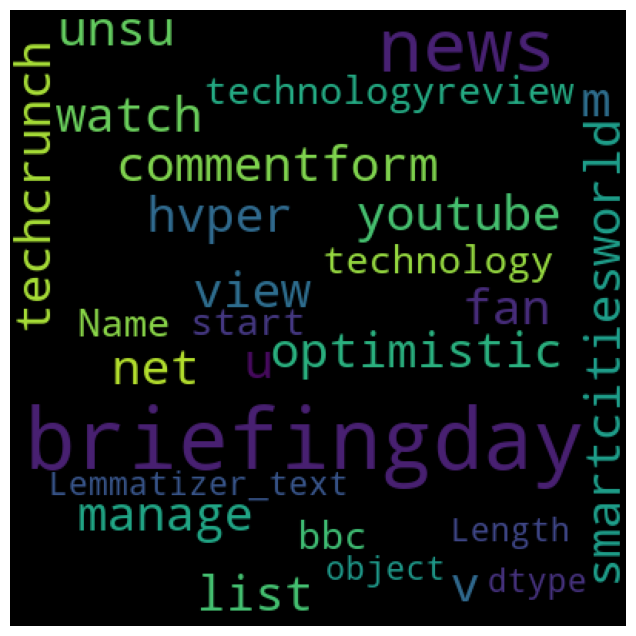

In [25]:
wordcloud = WordCloud(width = 400, height = 400, background_color = "black", max_words = 1000, min_font_size = 20, random_state = 42)\
    .generate(str(data_c["Lemmatizer_text"]))

fig = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [29]:
tokens_list = data_c["url"]
tokens_list = [" ".join(tokens) for tokens in tokens_list]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(tokens_list).toarray()
y = data_c["is_spam"]

#### Train test split

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
from sklearn.svm import SVC

model = SVC(kernel = "linear", random_state = 42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)